In [25]:
# THe source data page is in portuguese and the original archive is quite large
#Source data from here: https://download.inep.gov.br/microdados/microdados_enem_2020.zip
#The page from where is the link comes: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [26]:
#This whole dataframe is too Heavy for my simple computer (4 gb ram) so Only part of it is imported
cols1 = ["NU_INSCRICAO","NU_ANO","TP_FAIXA_ETARIA","TP_SEXO","TP_ESTADO_CIVIL","TP_COR_RACA",
        "TP_NACIONALIDADE","TP_ST_CONCLUSAO","TP_ANO_CONCLUIU","TP_ESCOLA","TP_ENSINO","IN_TREINEIRO","CO_MUNICIPIO_ESC",
         "NO_MUNICIPIO_ESC","SG_UF_ESC","TP_LOCALIZACAO_ESC","NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"]
microdataENEM_Participants = pd.read_csv('DADOS\MICRODADOS_ENEM_2020.csv',sep=";",encoding='ISO-8859-1',usecols = cols1)

In [3]:
#Memory Usage
microdataENEM_Participants.info(memory_usage = str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783109 entries, 0 to 5783108
Data columns (total 20 columns):
 #   Column              Dtype  
---  ------              -----  
 0   NU_INSCRICAO        int64  
 1   NU_ANO              int64  
 2   TP_FAIXA_ETARIA     int64  
 3   TP_SEXO             object 
 4   TP_ESTADO_CIVIL     int64  
 5   TP_COR_RACA         int64  
 6   TP_NACIONALIDADE    int64  
 7   TP_ST_CONCLUSAO     int64  
 8   TP_ANO_CONCLUIU     int64  
 9   TP_ESCOLA           int64  
 10  TP_ENSINO           float64
 11  IN_TREINEIRO        int64  
 12  NO_MUNICIPIO_ESC    object 
 13  SG_UF_ESC           object 
 14  TP_LOCALIZACAO_ESC  float64
 15  NU_NOTA_CN          float64
 16  NU_NOTA_CH          float64
 17  NU_NOTA_LC          float64
 18  NU_NOTA_MT          float64
 19  NU_NOTA_REDACAO     float64
dtypes: float64(7), int64(10), object(3)
memory usage: 882.4+ MB


In [4]:
microdataENEM_Participants.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'NO_MUNICIPIO_ESC', 'SG_UF_ESC', 'TP_LOCALIZACAO_ESC', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'],
      dtype='object')

In [5]:
#Check how many people per city
microdataENEM_Participants['NO_MUNICIPIO_ESC'].value_counts().sort_index()

Abadia de Goiás         23
Abadia dos Dourados     13
Abadiânia               99
Abaetetuba             850
Abaeté                  66
                      ... 
Áurea                    9
Ângulo                   3
Érico Cardoso           26
Óbidos                  81
Óleo                    17
Name: NO_MUNICIPIO_ESC, Length: 5268, dtype: int64

In [6]:
#Change the Age Ranges from numbered coded to real age
agedict = {1:"less than 17",
2:"17",
3:"18",
4:"19",
5:"20",
6:"21",
7:"22",
8:"23",
9:"24",
10:"25",
11:"26 - 30",
12:"31 - 35",
13:"36 - 40",
14:"41 - 45",
15:"46 - 50",
16:"51 - 55",
17:"56 - 60",
18:"61 - 65",
19:"66 - 70",
20:"more than 70"}
microdataENEM_Participants['TP_FAIXA_ETARIA'] = microdataENEM_Participants['TP_FAIXA_ETARIA'].replace(agedict)

In [7]:
#Check how many people per age
microdataENEM_Participants['TP_FAIXA_ETARIA'].value_counts()

18              887715
17              775404
19              609450
26 - 30         575442
20              459606
21              353734
31 - 35         341808
less than 17    336805
22              274709
23              239812
36 - 40         235027
24              204689
25              177344
41 - 45         143795
46 - 50          86079
51 - 55          47539
56 - 60          22383
61 - 65           8144
66 - 70           2693
more than 70       931
Name: TP_FAIXA_ETARIA, dtype: int64

<AxesSubplot:>

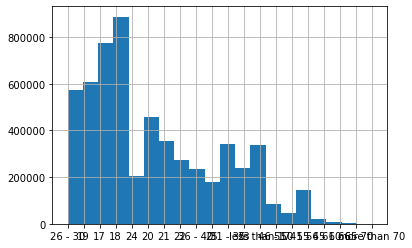

In [8]:
#histogram for age
microdataENEM_Participants['TP_FAIXA_ETARIA'].hist(bins = 20)

In [9]:
#Check people per state
microdataENEM_Participants['SG_UF_ESC'].value_counts()

SP    167183
CE    104981
MG     71614
RJ     62583
PE     47583
BA     47235
PR     43060
GO     39769
RS     36478
PA     33109
AM     30120
SC     27373
MA     26104
DF     19840
PB     19760
ES     18419
PI     15738
MT     14674
RN     14327
AL     13976
MS     11851
SE     10878
RO      9927
TO      8457
AP      3565
AC      3512
RR      2453
Name: SG_UF_ESC, dtype: int64

<AxesSubplot:>

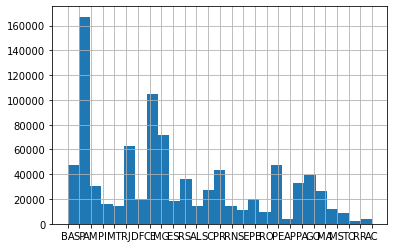

In [10]:
#Histogram for state participants
microdataENEM_Participants['SG_UF_ESC'].hist(bins=27)

In [11]:
#Proportion Male - Female
microdataENEM_Participants['TP_SEXO'].value_counts()

F    3468805
M    2314304
Name: TP_SEXO, dtype: int64

In [12]:
#Percentual Proportions of Gender
proportion_gender = [100*x/microdataENEM_Participants['TP_SEXO'].value_counts().sum() for x in microdataENEM_Participants['TP_SEXO'].value_counts()]
proportion_gender

[59.98166384206142, 40.01833615793858]

In [13]:
#Check difference in text creation scores between Males and Females
gender_textscore  = microdataENEM_Participants.filter(items = ['TP_SEXO','NU_NOTA_REDACAO'])
gender_textscore = gender_textscore.dropna()
#counts per gender
gender_textscore.groupby('TP_SEXO').count()

,NU_NOTA_REDACAO
TP_SEXO,
F,1663652
M,1090488


In [14]:
#average -Mean-  Scores
gender_textscore.groupby('TP_SEXO').mean()

,NU_NOTA_REDACAO
TP_SEXO,
F,588.297913
M,550.703832


In [15]:
#Median  Scores
gender_textscore.groupby('TP_SEXO').median()

,NU_NOTA_REDACAO
TP_SEXO,
F,580.0
M,560.0


In [16]:
#Minimum Score other than 0
gender_textscore[gender_textscore['NU_NOTA_REDACAO'] > 0].groupby('TP_SEXO').min()

,NU_NOTA_REDACAO
TP_SEXO,
F,40.0
M,40.0


TP_SEXO
F    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
M    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

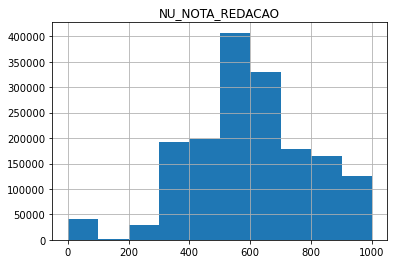

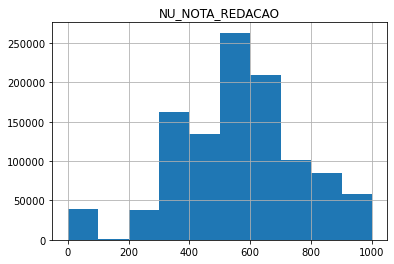

In [17]:
#Histogram of Writting skill scores by gender
gender_textscore.groupby('TP_SEXO').hist()

In [18]:
#Full basic statistical info:
gender_textscore.groupby('TP_SEXO').describe()

NU_NOTA_REDACAO                                                    \
                  count        mean         std  min    25%    50%    75%   
TP_SEXO                                                                     
F             1663652.0  588.297913  196.467114  0.0  480.0  580.0  720.0   
M             1090488.0  550.703832  202.735245  0.0  420.0  560.0  680.0   

                 
            max  
TP_SEXO          
F        1000.0  
M        1000.0

### Analisis of socio economic data 

In [3]:
#A new DF needs to be created with the specific data given the machine limitation
cols2 = ['NU_INSCRICAO','NU_NOTA_MT','NU_NOTA_REDACAO','Q001','Q002']
se_write_ENEM = pd.read_csv('DADOS\MICRODADOS_ENEM_2020.csv',sep=";",encoding='ISO-8859-1',usecols = cols2)

In [20]:
se_write_ENEM.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,200006271946,NaN,NaN,NaN,NaN
1,200001195856,711.3,580.0,NaN,NaN
2,200001943954,NaN,NaN,B,C
3,200001908998,759.4,760.0,NaN,NaN
4,200001634757,NaN,NaN,B,G


In [21]:
#Remove NA values
se_write_ENEM = se_write_ENEM.dropna()

In [14]:
q1q2_dict = {"A":"Nunca estudou.",
"B":"Não completou a 4ª série/5º ano do Ensino Fundamental.",
"C":"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",
"D":"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",
"E":"Completou o Ensino Médio, mas não completou a Faculdade.",
"F":"Completou a Faculdade, mas não completou a Pós-graduação.",
"G":"Completou a Pós-graduação.",
"H":"Não sei."}

In [48]:
se_write_ENEM['NO_Q001'] = [q1q2_dict[a] for a in se_write_ENEM['Q001']]

C:\Users\felip\AppData\Local\Temp/ipykernel_644/2039161572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se_write_ENEM['NO_Q001'] = [q1q2_dict[a] for a in se_write_ENEM['Q001']]


In [49]:
se_write_ENEM['NO_Q002'] = [q1q2_dict[a] for a in se_write_ENEM['Q002']]

C:\Users\felip\AppData\Local\Temp/ipykernel_644/3971703150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se_write_ENEM['NO_Q002'] = [q1q2_dict[a] for a in se_write_ENEM['Q002']]


In [25]:
se_write_ENEM.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002
5,200003132410,526.7,700.0,C,B,"Completou a 4ª série/5º ano, mas não completou...",Não completou a 4ª série/5º ano do Ensino Fund...
8,200006762554,448.5,600.0,B,C,Não completou a 4ª série/5º ano do Ensino Fund...,"Completou a 4ª série/5º ano, mas não completou..."
11,200006138472,546.5,640.0,B,C,Não completou a 4ª série/5º ano do Ensino Fund...,"Completou a 4ª série/5º ano, mas não completou..."
18,200003343448,420.3,800.0,C,C,"Completou a 4ª série/5º ano, mas não completou...","Completou a 4ª série/5º ano, mas não completou..."
19,200005966328,405.6,500.0,C,D,"Completou a 4ª série/5º ano, mas não completou...",Completou a 8ª série/9º ano do Ensino Fundamen...


In [26]:
# Distribution for father scholarity 
se_write_ENEM.filter(items = ['NU_INSCRICAO','NO_Q001']).groupby('NO_Q001').count().sort_values(by = 'NU_INSCRICAO',ascending = False)

,NU_INSCRICAO
NO_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade.",736397
Não completou a 4ª série/5º ano do Ensino Fundamental.,483323
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",352976
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",284175
"Completou a Faculdade, mas não completou a Pós-graduação.",233881
Não sei.,199727
Completou a Pós-graduação.,157039
Nunca estudou.,113786


In [27]:
# Distribution for mother scholarity 
se_write_ENEM.filter(items = ['NU_INSCRICAO','NO_Q002']).groupby('NO_Q002').count().sort_values(by = 'NU_INSCRICAO',ascending = False)

,NU_INSCRICAO
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade.",881498
Não completou a 4ª série/5º ano do Ensino Fundamental.,358276
"Completou a Faculdade, mas não completou a Pós-graduação.",312436
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",306430
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",294949
Completou a Pós-graduação.,275108
Nunca estudou.,76337
Não sei.,56270


In [28]:
#Mathematic Scores average based on Father Scholarity 
se_write_ENEM.filter(items = ['NU_NOTA_MT','NO_Q001']).groupby('NO_Q001').mean().sort_values(by = 'NU_NOTA_MT',ascending = False)

,NU_NOTA_MT
NO_Q001,
Completou a Pós-graduação.,620.382538
"Completou a Faculdade, mas não completou a Pós-graduação.",598.426301
"Completou o Ensino Médio, mas não completou a Faculdade.",534.797631
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",511.877629
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",499.029500
Não sei.,490.961933
Não completou a 4ª série/5º ano do Ensino Fundamental.,478.183048
Nunca estudou.,455.340086


In [29]:
#Mathematic Scores average based on Mother Scholarity 
se_write_ENEM.filter(items = ['NU_NOTA_MT','NO_Q002']).groupby('NO_Q002').mean().sort_values(by = 'NU_NOTA_MT',ascending = False)

,NU_NOTA_MT
NO_Q002,
Completou a Pós-graduação.,594.897645
"Completou a Faculdade, mas não completou a Pós-graduação.",580.438367
"Completou o Ensino Médio, mas não completou a Faculdade.",523.880757
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",499.628369
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",488.812625
Não sei.,478.135403
Não completou a 4ª série/5º ano do Ensino Fundamental.,470.848168
Nunca estudou.,448.565889


In [30]:
#Writting Scores average based on Father Scholarity 
se_write_ENEM.filter(items = ['NU_NOTA_REDACAO','NO_Q001']).groupby('NO_Q001').mean().sort_values(by = 'NU_NOTA_REDACAO',ascending = False)

,NU_NOTA_REDACAO
NO_Q001,
Completou a Pós-graduação.,703.820707
"Completou a Faculdade, mas não completou a Pós-graduação.",676.863448
"Completou o Ensino Médio, mas não completou a Faculdade.",604.508709
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",575.299446
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",555.248572
Não sei.,539.446545
Não completou a 4ª série/5º ano do Ensino Fundamental.,523.368844
Nunca estudou.,486.152602


In [31]:
#Writting Scores average based on Mother Scholarity 
se_write_ENEM.filter(items = ['NU_NOTA_REDACAO','NO_Q002']).groupby('NO_Q002').mean().sort_values(by = 'NU_NOTA_REDACAO',ascending = False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação.,679.137793
"Completou a Faculdade, mas não completou a Pós-graduação.",657.117362
"Completou o Ensino Médio, mas não completou a Faculdade.",590.947841
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",557.553814
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",538.449630
Não completou a 4ª série/5º ano do Ensino Fundamental.,510.052194
Não sei.,505.353830
Nunca estudou.,468.926733


<AxesSubplot:xlabel='NO_Q002'>

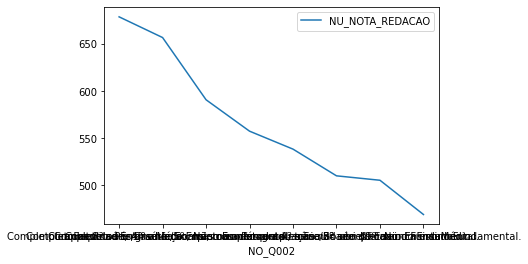

In [32]:
#Writing scores based on Mother's scholarity plot
se_write_ENEM.filter(items = ['NU_NOTA_REDACAO','NO_Q002']).groupby('NO_Q002').mean().sort_values(by = 'NU_NOTA_REDACAO',ascending = False).plot()

In [33]:
se_write_ENEM.filter(items = ['NU_NOTA_REDACAO','NO_Q002']).groupby('NO_Q002').describe()

NU_NOTA_REDACAO  \
                                                             count   
NO_Q002                                                              
Completou a 4ª série/5º ano, mas não completou ...        306430.0   
Completou a 8ª série/9º ano do Ensino Fundament...        294949.0   
Completou a Faculdade, mas não completou a Pós-...        312436.0   
Completou a Pós-graduação.                                275108.0   
Completou o Ensino Médio, mas não completou a F...        881498.0   
Nunca estudou.                                             76337.0   
Não completou a 4ª série/5º ano do Ensino Funda...        358276.0   
Não sei.                                                   56270.0   

                                                                            \
                                                          mean         std   
NO_Q002                                                                      
Completou a 4ª série/5º ano, mas não completou ...  538.449630  184.928330   
Completou a 8ª série/9º ano do Ensino Fundament...  557.553814  186.716785   
Completou a Faculdade, mas não completou a Pós-...  657.117362  191.963075   
Completou a Pós-graduação.                          679.137793  192.019187   
Completou o Ensino Médio, mas não completou a F...  590.947841  189.979871   
Nunca estudou.                                      468.926733  182.206003   
Não completou a 4ª série/5º ano do Ensino Funda...  510.052194  179.744986   
Não sei.                                            505.353830  192.640930   

                                                                              \
                                                    min    25%    50%    75%   
NO_Q002                                                                        
Completou a 4ª série/5º ano, mas não completou ...  0.0  420.0  540.0  640.0   
Completou a 8ª série/9º ano do Ensino Fundament...  0.0  440.0  560.0  660.0   
Completou a Faculdade, mas não completou a Pós-...  0.0  540.0  660.0  820.0   
Completou a Pós-graduação.                          0.0  560.0  680.0  840.0   
Completou o Ensino Médio, mas não completou a F...  0.0  480.0  580.0  720.0   
Nunca estudou.                                      0.0  360.0  480.0  580.0   
Não completou a 4ª série/5º ano do Ensino Funda...  0.0  380.0  520.0  600.0   
Não sei.                                            0.0  380.0  520.0  620.0   

                                                            
                                                       max  
NO_Q002                                                     
Completou a 4ª série/5º ano, mas não completou ...   980.0  
Completou a 8ª série/9º ano do Ensino Fundament...   980.0  
Completou a Faculdade, mas não completou a Pós-...  1000.0  
Completou a Pós-graduação.                          1000.0  
Completou o Ensino Médio, mas não completou a F...  1000.0  
Nunca estudou.                                       980.0  
Não completou a 4ª série/5º ano do Ensino Funda...  1000.0  
Não sei.                                             980.0

### Checking for Parents Scholarity Impact on Students result per state

In [4]:
se_write_ENEM['SG_UF_ESC'] = microdataENEM_Participants['SG_UF_ESC']

In [5]:
se_write_ENEM = se_write_ENEM.dropna()

In [51]:
se_write_ENEM.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,SG_UF_ESC,NO_Q001,NO_Q002
36,200003209996,433.9,620.0,E,E,AM,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."
65,200003350911,384.2,880.0,A,C,PI,Nunca estudou.,"Completou a 4ª série/5º ano, mas não completou..."
84,200005725669,404.6,600.0,C,E,MT,"Completou a 4ª série/5º ano, mas não completou...","Completou o Ensino Médio, mas não completou a ..."
89,200004462096,669.8,820.0,B,C,SP,Não completou a 4ª série/5º ano do Ensino Fund...,"Completou a 4ª série/5º ano, mas não completou..."
93,200002727241,743.0,920.0,E,E,RJ,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."


In [53]:
#Checking tendency on Parana State
se_write_ENEM.filter(items = ['NU_NOTA_REDACAO','NO_Q002'])\
.where(se_write_ENEM['SG_UF_ESC'] == 'PR')\
.groupby('NO_Q002')\
.mean().sort_values(by ='NU_NOTA_REDACAO', ascending = False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação.,657.622495
"Completou a Faculdade, mas não completou a Pós-graduação.",648.824593
"Completou o Ensino Médio, mas não completou a Faculdade.",592.377049
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",561.086331
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",544.190193
Não completou a 4ª série/5º ano do Ensino Fundamental.,528.410405
Não sei.,523.267108
Nunca estudou.,473.636364


In [60]:
pd.set_option('max_rows',1000)

In [64]:
#Checking for all states
se_write_ENEM.filter(items = ['SG_UF_ESC','NU_NOTA_REDACAO','NO_Q002'])\
.groupby(['SG_UF_ESC','NO_Q002'])\
.mean().sort_values(by ='NU_NOTA_REDACAO', ascending = False)\
.unstack()

NU_NOTA_REDACAO  \
NO_Q002   Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.   
SG_UF_ESC                                                                                           
AC                                                521.871921                                        
AL                                                562.371234                                        
AM                                                489.638826                                        
AP                                                527.887324                                        
BA                                                529.539919                                        
CE                                                515.616655                                        
DF                                                558.395833                                        
ES                                                551.026217                                        
GO                                                541.135678                                        
MA                                                500.590769                                        
MG                                                588.849162                                        
MS                                                530.586011                                        
MT                                                544.938272                                        
PA                                                514.630940                                        
PB                                                577.014577                                        
PE                                                539.849575                                        
PI                                                547.339901                                        
PR                                                544.190193                                        
RJ                                                576.738255                                        
RN                                                573.666954                                        
RO                                                528.942731                                        
RR                                                478.208955                                        
RS                                                570.793784                                        
SC                                                570.887154                                        
SE                                                574.160757                                        
SP                                                570.986239                                        
TO                                                508.216561                                        

                                                                                                \
NO_Q002   Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.   
SG_UF_ESC                                                                                        
AC                                                542.767857                                     
AL                                                566.282723                                     
AM                                                505.050676                                     
AP                                                499.303483                                     
BA                                                552.584824                                     
CE                                                547.007433                                     
DF                                                563.814844                                     
ES                                                575.151057           

In [12]:
#The table looks bad so better have a graph
import matplotlib.pyplot as plt
import re

Text(0.02, 0.8, 'A : Nunca estudou.\nB : Não completou a 4ª série/5º ano do Ensino Fundamental.\nC : Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.\nD : Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.\nE : Completou o Ensino Médio, mas não completou a Faculdade.\nF : Completou a Faculdade, mas não completou a Pós-graduação.\nG : Completou a Pós-graduação.\nH : Não sei.\n')

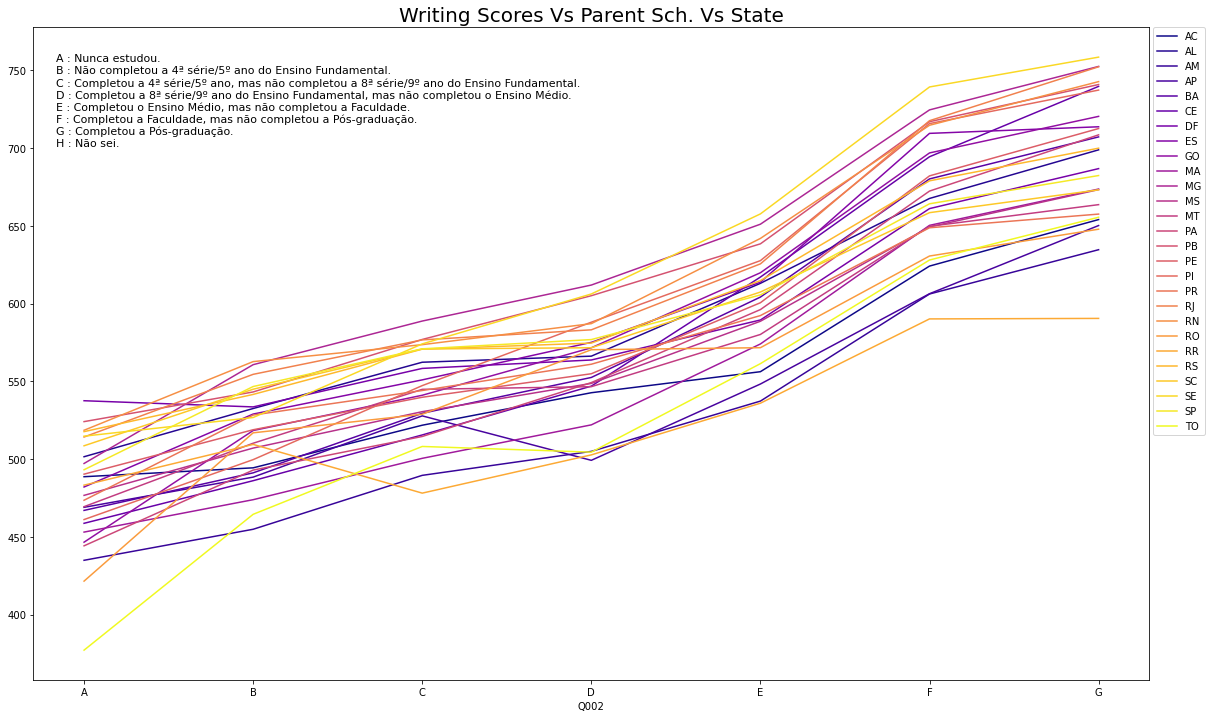

In [30]:
#fig, ax = plt.subplots(figsize = (20,12))
#plt.suptitle('Writing Scores Vs Parent Sch. Vs State')
#The info about not informed mother scholarity shall be removed
ax = se_write_ENEM.filter(items = ['SG_UF_ESC','NU_NOTA_REDACAO','Q002'])\
.where(se_write_ENEM['Q002'] != 'H')\
.groupby(['Q002','SG_UF_ESC'])\
.mean().sort_values(by ='NU_NOTA_REDACAO', ascending = False)\
.unstack().plot(figsize = (20,12),colormap='plasma')
ax.set_title('Writing Scores Vs Parent Sch. Vs State',fontsize=20)

handles, labels = ax.get_legend_handles_labels()
edited_labels = [re.search(',\s(.+?)\)',label).group(1) for label in labels]
ax.legend(edited_labels,bbox_to_anchor = (1.05,1),loc=0,borderaxespad = 0.)

txtdictQ002 = ""
for k,v in q1q2_dict.items():
    txtdictQ002 = txtdictQ002 + f"{k} : {v}\n"
        
ax.text(0.02,0.8,txtdictQ002,transform =  ax.transAxes,fontsize = 11)

In [46]:
#Check for the mean of each area per city
city_score_mean = microdataENEM_Participants.filter(items = ["CO_MUNICIPIO_ESC","NO_MUNICIPIO_ESC","SG_UF_ESC",
                                                             "NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT",
                                                             "NU_NOTA_REDACAO"])

In [48]:
city_score_mean_tb = city_score_mean.groupby(["CO_MUNICIPIO_ESC","NO_MUNICIPIO_ESC","SG_UF_ESC"], as_index = False).mean()

In [49]:
#Exporting the averages for future use
city_score_mean_tb.to_csv('scores_per_municipality_ENEM_2020.csv')

### Starting a df from previously exported data - Scores Vs Human Development Index per city

In [18]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

city_avg = pd.read_csv('scores_per_municipality_ENEM_2020.csv',sep=',',index_col = 0)
city_avg['CO_MUNICIPIO_ESC'] = city_avg['CO_MUNICIPIO_ESC'].astype(int) 

In [19]:
city_avg

,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,1100015,Alta Floresta D'Oeste,RO,488.157812,495.502941,513.200000,506.317187,590.882353
1,1100023,Ariquemes,RO,491.511969,503.362411,517.528369,515.933591,555.319149
2,1100031,Cabixi,RO,493.366667,487.233333,537.366667,469.800000,473.333333
3,1100049,Cacoal,RO,497.413115,510.974848,525.507273,535.113443,587.818182
4,1100056,Cerejeiras,RO,471.411429,493.240000,507.700000,496.380000,530.857143
...,...,...,...,...,...,...,...,...
5529,5222005,Vianópolis,GO,478.251724,493.925806,519.993548,515.641379,572.903226
5530,5222054,Vicentinópolis,GO,518.009091,539.083333,533.233333,551.954545,530.000000
5531,5222203,Vila Boa,GO,427.487500,429.912500,471.200000,416.662500,385.000000
5532,5222302,Vila Propício,GO,447.200000,464.092857,491.478571,495.642857,462.857143


In [20]:
#Table for IDHM found on https://1drv.ms/u/s!AuwEBHxVU0YSgbNpGJXSZvUd7K47FQ?e=ZhrV8y
#Data Prefiltered in Excel to select only last census (2010)
atlasIDHM = pd.read_excel('Atlas 2013_municipal_Brasil.xlsx')

In [21]:
atlasIDHM.head()

,ANO,UF,Codmun6,Codmun7,Município,IDHM,IDHM_E,IDHM_L,IDHM_R,LONG,LAT,Alt
0,2010,11,110001,1100015,ALTA FLORESTA D'OESTE,0.641,0.526,0.763,0.657,-61.999824,-11.935540,337.735719
1,2010,11,110002,1100023,ARIQUEMES,0.702,0.600,0.806,0.716,-63.033269,-9.908463,138.688981
2,2010,11,110003,1100031,CABIXI,0.650,0.559,0.757,0.650,-60.544314,-13.499763,236.063160
3,2010,11,110004,1100049,CACOAL,0.718,0.620,0.821,0.727,-61.442944,-11.433865,177.453547
4,2010,11,110005,1100056,CEREJEIRAS,0.692,0.602,0.799,0.688,-60.818426,-13.195033,262.811307


In [22]:
#Merge the datasets
avgENEM_IDHM = pd.merge(city_avg,atlasIDHM,how = 'left',left_on = ['CO_MUNICIPIO_ESC'], right_on = ['Codmun7'])

In [23]:
avgENEM_IDHM

,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,ANO,UF,Codmun6,Codmun7,Município,IDHM,IDHM_E,IDHM_L,IDHM_R,LONG,LAT,Alt
0,1100015,Alta Floresta D'Oeste,RO,488.157812,495.502941,513.200000,506.317187,590.882353,2010.0,11.0,110001.0,1100015.0,ALTA FLORESTA D'OESTE,0.641,0.526,0.763,0.657,-61.999824,-11.935540,337.735719
1,1100023,Ariquemes,RO,491.511969,503.362411,517.528369,515.933591,555.319149,2010.0,11.0,110002.0,1100023.0,ARIQUEMES,0.702,0.600,0.806,0.716,-63.033269,-9.908463,138.688981
2,1100031,Cabixi,RO,493.366667,487.233333,537.366667,469.800000,473.333333,2010.0,11.0,110003.0,1100031.0,CABIXI,0.650,0.559,0.757,0.650,-60.544314,-13.499763,236.063160
3,1100049,Cacoal,RO,497.413115,510.974848,525.507273,535.113443,587.818182,2010.0,11.0,110004.0,1100049.0,CACOAL,0.718,0.620,0.821,0.727,-61.442944,-11.433865,177.453547
4,1100056,Cerejeiras,RO,471.411429,493.240000,507.700000,496.380000,530.857143,2010.0,11.0,110005.0,1100056.0,CEREJEIRAS,0.692,0.602,0.799,0.688,-60.818426,-13.195033,262.811307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5529,5222005,Vianópolis,GO,478.251724,493.925806,519.993548,515.641379,572.903226,2010.0,52.0,522200.0,5222005.0,VIANÓPOLIS,0.712,0.622,0.818,0.710,-48.513471,-16.742081,1003.087040
5530,5222054,Vicentinópolis,GO,518.009091,539.083333,533.233333,551.954545,530.000000,2010.0,52.0,522205.0,5222054.0,VICENTINÓPOLIS,0.684,0.562,0.804,0.707,-49.807239,-17.732662,654.699553
5531,5222203,Vila Boa,GO,427.487500,429.912500,471.200000,416.662500,385.000000,2010.0,52.0,522220.0,5222203.0,VILA BOA,0.647,0.534,0.818,0.619,-47.057361,-15.034889,503.022201
5532,5222302,Vila Propício,GO,447.200000,464.092857,491.478571,495.642857,462.857143,2010.0,52.0,522230.0,5222302.0,VILA PROPÍCIO,0.634,0.505,0.802,0.629,-48.882422,-15.454635,733.882520


In [7]:
avgENEM_IDHM.dtypes

CO_MUNICIPIO_ESC      int32
NO_MUNICIPIO_ESC     object
SG_UF_ESC            object
NU_NOTA_CN          float64
NU_NOTA_CH          float64
NU_NOTA_LC          float64
NU_NOTA_MT          float64
NU_NOTA_REDACAO     float64
ANO                 float64
UF                  float64
Codmun6             float64
Codmun7             float64
Município            object
IDHM                float64
IDHM_E              float64
IDHM_L              float64
IDHM_R              float64
dtype: object

In [15]:
#Build Scatter PLot for data to check correlations - Maths Scores Vs Human Development Index
# Scores Below and Above average (x axis) -- HDI above and below the average (y axis)

def create_4plot(score):
    avgScoreMt = avgENEM_IDHM[score].mean()
    avgHDI = avgENEM_IDHM['IDHM'].mean()
    q1 = avgENEM_IDHM[(avgENEM_IDHM[score] < avgScoreMt)&(avgENEM_IDHM['IDHM'] < avgHDI)]
    q2 = avgENEM_IDHM[(avgENEM_IDHM[score] < avgScoreMt)&(avgENEM_IDHM['IDHM'] > avgHDI)]
    q3 = avgENEM_IDHM[(avgENEM_IDHM[score] > avgScoreMt)&(avgENEM_IDHM['IDHM'] > avgHDI)] 
    q4 = avgENEM_IDHM[(avgENEM_IDHM[score] > avgScoreMt)&(avgENEM_IDHM['IDHM'] < avgHDI)]

    fig, ax = plt.subplots(2,2, figsize = (16,10),sharex = 'col',sharey ='row')
    plt.subplots_adjust(wspace = 0.01, hspace = 0.02)
    print(f"Q1: {round(len(q1[score])*100/len(avgENEM_IDHM[score]),2)}, low HDI and low Test Scores")
    print(f"Q2: {round(len(q2[score])*100/len(avgENEM_IDHM[score]),2)}, high HDI and low Test Scores")
    print(f"Q3: {round(len(q3[score])*100/len(avgENEM_IDHM[score]),2)}, high HDI and high Test Scores")
    print(f"Q4: {round((len(q4[score])*100/len(avgENEM_IDHM[score])),2)}, low HDI and high Test Scores")

    q1.plot.scatter(score,'IDHM', ax = ax[1,0], color = 'orange',s=4,xlim = (avgENEM_IDHM[score].min(),avgScoreMt), ylim = (avgENEM_IDHM['IDHM'].min(),avgHDI))
    q2.plot.scatter(score,'IDHM', ax = ax[0,0], color = 'green',s=4,xlim = (avgENEM_IDHM[score].min(),avgScoreMt), ylim = (avgHDI, avgENEM_IDHM['IDHM'].max()))
    q3.plot.scatter(score,'IDHM', ax = ax[0,1], color = 'blue',s=4,xlim = (avgScoreMt,avgENEM_IDHM[score].max()), ylim = (avgHDI, avgENEM_IDHM['IDHM'].max()))

    q4.plot.scatter(score,'IDHM', ax = ax[1,1], color = 'red',s=4,xlim = (avgScoreMt,avgENEM_IDHM[score].max()), ylim = (avgENEM_IDHM['IDHM'].min(),avgHDI))

Q1: 29.42, low HDI and low Test Scores
Q2: 17.82, high HDI and low Test Scores
Q3: 33.32, high HDI and high Test Scores
Q4: 17.64, low HDI and high Test Scores


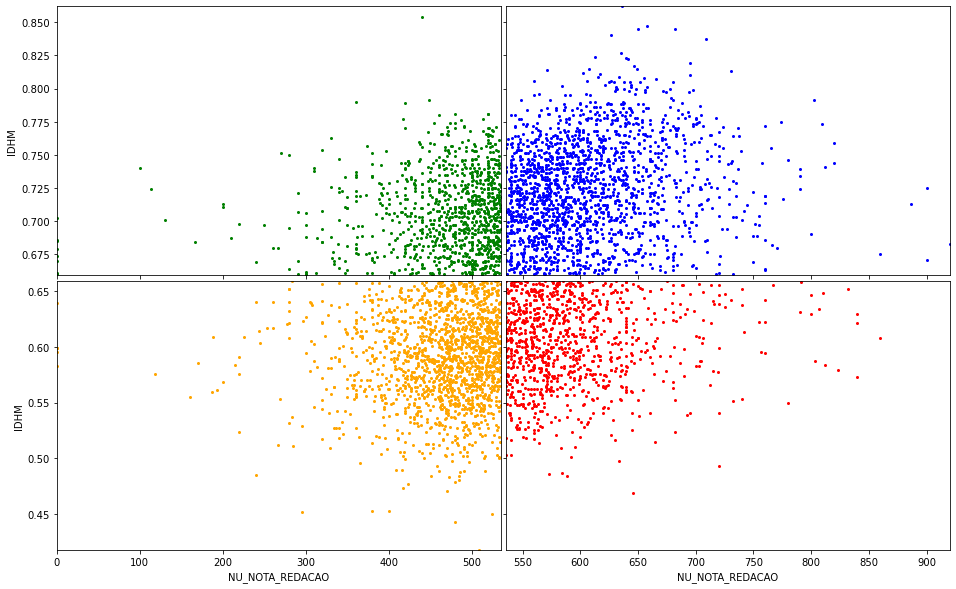

In [16]:
#Writting Skills
create_4plot('NU_NOTA_REDACAO')

Q1: 36.5, low HDI and low Test Scores
Q2: 15.09, high HDI and low Test Scores
Q3: 35.8, high HDI and high Test Scores
Q4: 10.55, low HDI and high Test Scores


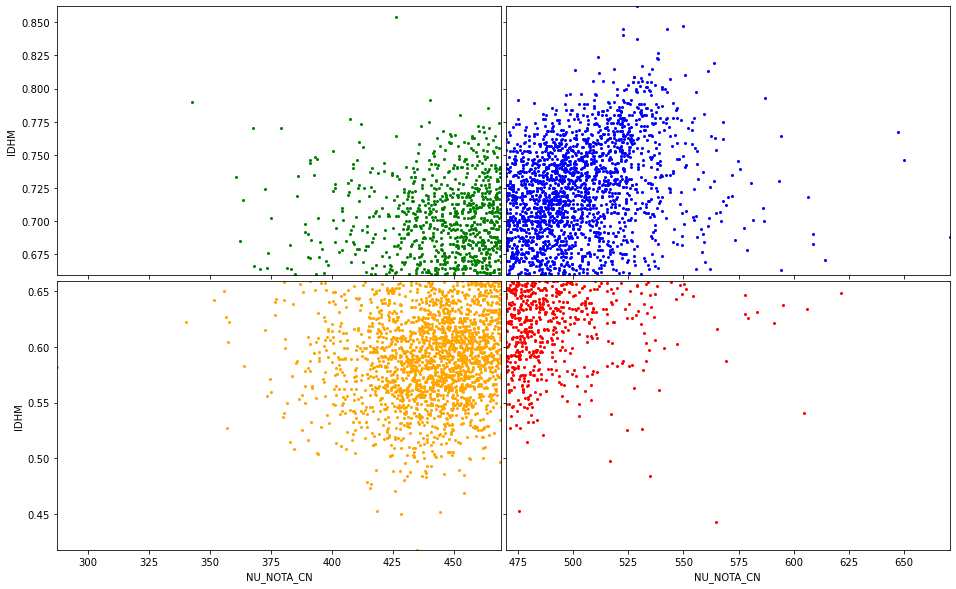

In [17]:
#Natural Sciences skills
create_4plot('NU_NOTA_CN')

## Brazilian Map - Scores Vs HDI

In [27]:
#To get the Latitude and Longitude another dataset had to be added to the HDI one
#Source: https://www.kaggle.com/datasets/BrasilComCenso/atlas-idhm-brasil-1991-2000-e-2010-lat-e-long

In [69]:
#Map graph based on scores
def mapBR(score,coord):
    nmdict = {"CN":'Natural Sciences',"MT":"Maths","CH":"Humanities","LC":"Languages","IDHM":"HDI City","E":"Education","L":"Longevity","R":"Wealth"}
    nmscore = nmdict[score.split('_')[-1]]
    avgENEM_IDHM.plot.scatter(y='LAT', x = 'LONG',s=4,c = avgENEM_IDHM[score], alpha = 1,cmap = 'brg',title = f'{nmscore} Scores',ax =ax[coord[0],coord[1]])

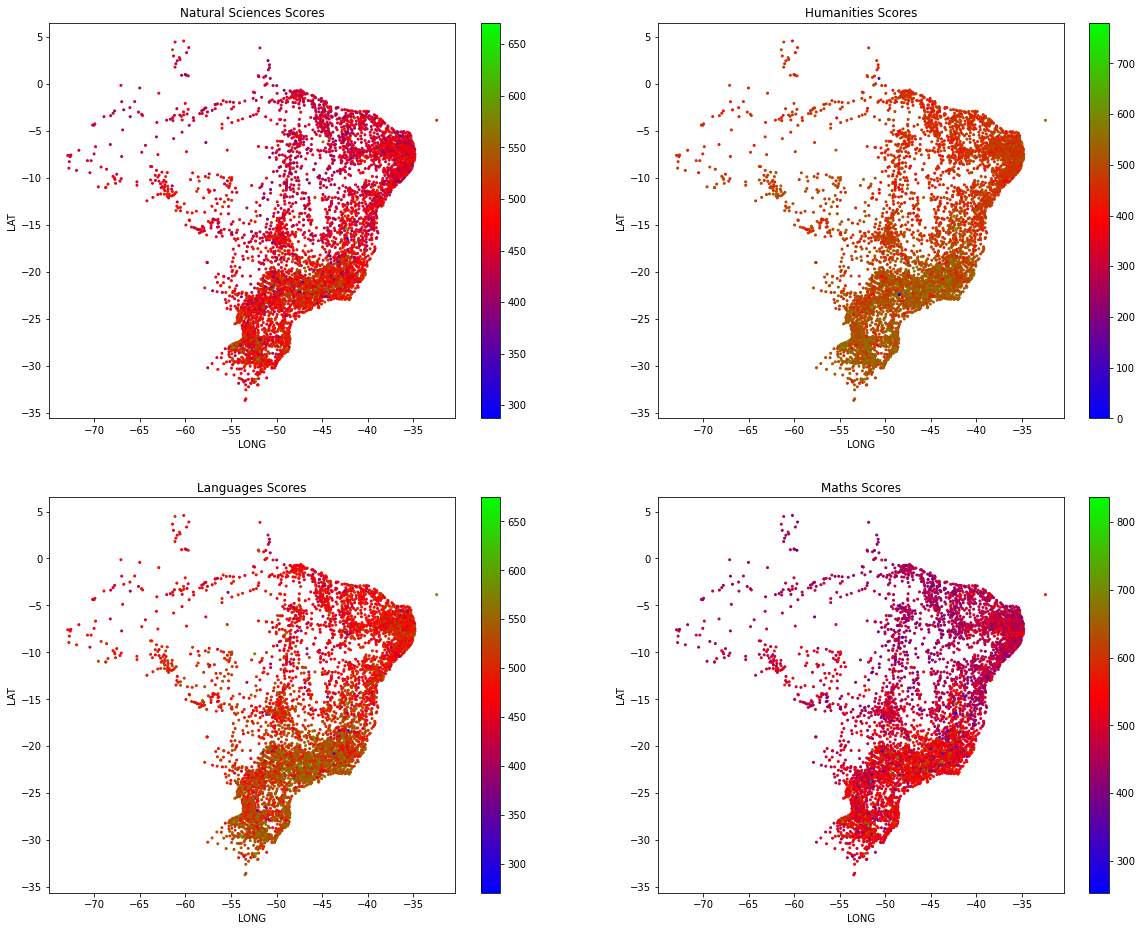

In [70]:
#All four maps based on scores
fig, ax = plt.subplots(2,2, figsize = (20,16))
mapBR('NU_NOTA_CN',[0,0])
mapBR('NU_NOTA_CH',[0,1])
mapBR('NU_NOTA_LC',[1,0])
mapBR('NU_NOTA_MT',[1,1])

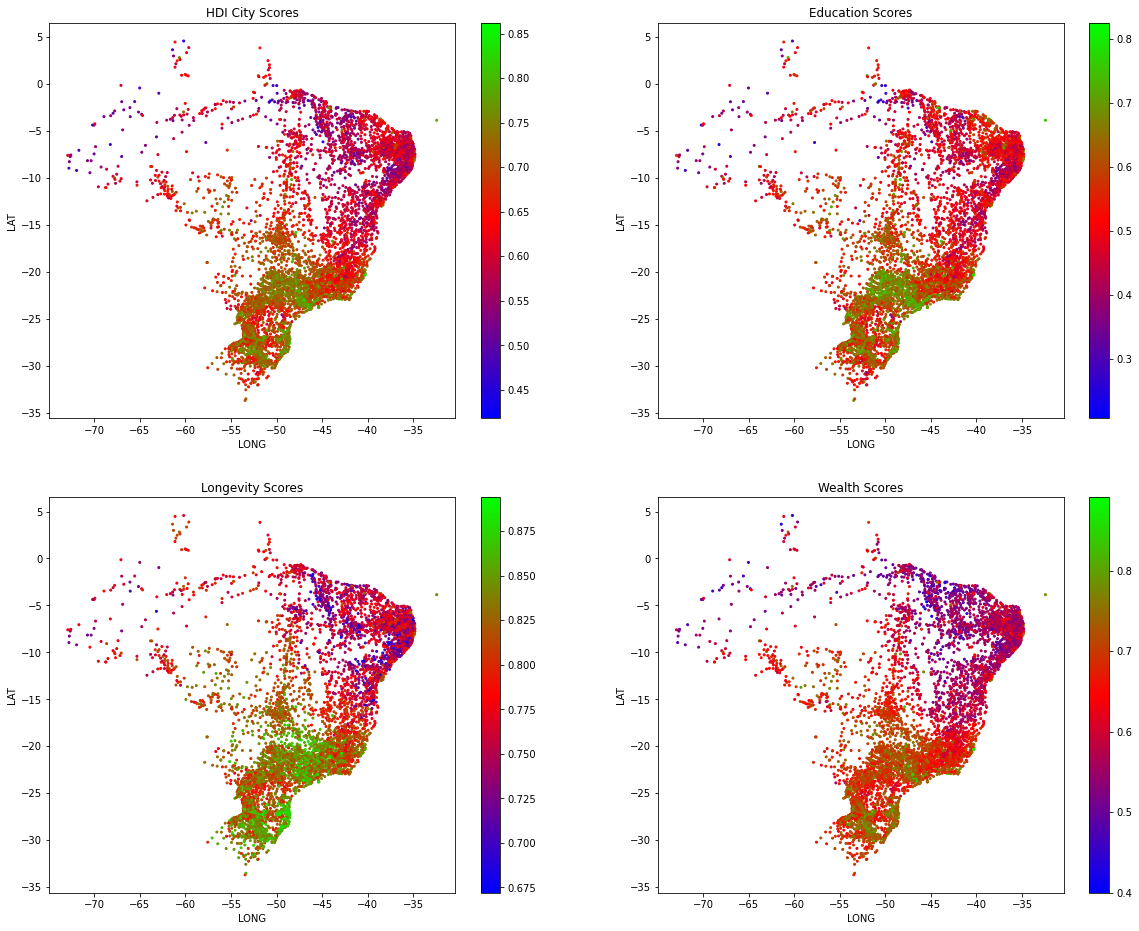

In [71]:
#Same map but now considering the Different Human Development Index:
fig, ax = plt.subplots(2,2, figsize = (20,16))
mapBR('IDHM',[0,0])
mapBR('IDHM_E',[0,1])
mapBR('IDHM_L',[1,0])
mapBR('IDHM_R',[1,1])

### Check for the Missing Data from the Datasets

In [29]:
#To make Analysis easier only one state will be analysed: PR
microdataENEM_Participants[microdataENEM_Participants['SG_UF_ESC'] == 'PR'].to_csv('microdata_ENEM_PR.csv', encoding='ISO-8859-1')

In [1]:
#Start From here - Reimport Pandas in case you want to run only this part of the code
import pandas as pd
microdataENEM_PR = pd.read_csv('microdata_ENEM_PR.csv', encoding='ISO-8859-1', index_col = 0)

In [7]:
microdataENEM_PR.isna().sum().sort_values(ascending = False)

NU_NOTA_CN            16166
NU_NOTA_MT            16166
NU_NOTA_REDACAO       15044
NU_NOTA_LC            15044
NU_NOTA_CH            15044
TP_ENSINO              1142
TP_NACIONALIDADE          0
TP_ST_CONCLUSAO           0
TP_ANO_CONCLUIU           0
TP_ESCOLA                 0
NU_ANO                    0
IN_TREINEIRO              0
CO_MUNICIPIO_ESC          0
NO_MUNICIPIO_ESC          0
SG_UF_ESC                 0
TP_LOCALIZACAO_ESC        0
TP_COR_RACA               0
TP_ESTADO_CIVIL           0
TP_SEXO                   0
TP_FAIXA_ETARIA           0
NU_INSCRICAO              0
dtype: int64

In [8]:
microdataENEM_PR.dropna(subset = ['NU_NOTA_CN','NU_NOTA_MT','NU_NOTA_REDACAO','NU_NOTA_LC','NU_NOTA_CH'],inplace = True)

In [9]:
microdataENEM_PR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26844 entries, 1238 to 5782082
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NU_INSCRICAO        26844 non-null  int64  
 1   NU_ANO              26844 non-null  int64  
 2   TP_FAIXA_ETARIA     26844 non-null  int64  
 3   TP_SEXO             26844 non-null  object 
 4   TP_ESTADO_CIVIL     26844 non-null  int64  
 5   TP_COR_RACA         26844 non-null  int64  
 6   TP_NACIONALIDADE    26844 non-null  int64  
 7   TP_ST_CONCLUSAO     26844 non-null  int64  
 8   TP_ANO_CONCLUIU     26844 non-null  int64  
 9   TP_ESCOLA           26844 non-null  int64  
 10  TP_ENSINO           26482 non-null  float64
 11  IN_TREINEIRO        26844 non-null  int64  
 12  CO_MUNICIPIO_ESC    26844 non-null  float64
 13  NO_MUNICIPIO_ESC    26844 non-null  object 
 14  SG_UF_ESC           26844 non-null  object 
 15  TP_LOCALIZACAO_ESC  26844 non-null  float64
 16 

#### The State Cleaned DF can be used to perform the same analysis as done before on the whole country